## Devasy Patel
## 20BCE057
## Practical - 2
# DIPA

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('img.jpeg')

In [ ]:
img.shape

(618, 1000, 3)

In [ ]:
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

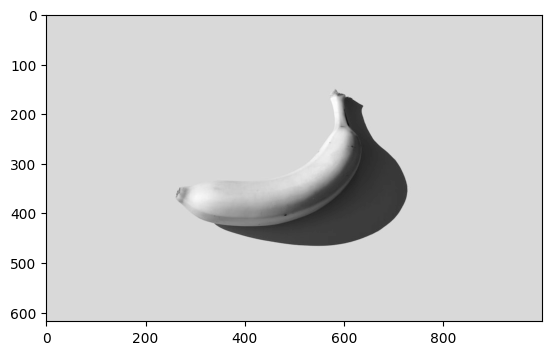

In [ ]:
plt.imshow(gimg, cmap='gray')

In [ ]:
h, w = gimg.shape

In [ ]:
new_img = np.zeros((h//2,w//2), dtype = 'uint8')

In [ ]:
new_img.shape

(309, 500)

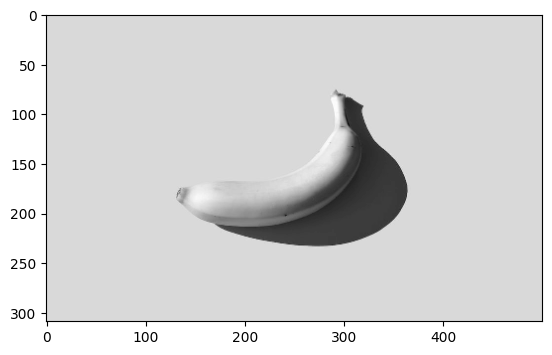

In [ ]:
for i in range(h//2):
  for j in range(w//2):
    new_img[i][j] = gimg[2*i][2*j]
plt.imshow(new_img, cmap='gray')

In [ ]:
plt.imsave('shrinkedimg.jpg', new_img, cmap='gray')

In [ ]:
import numpy as np
def mat_interpolate(mat):
  newm1 = np.zeros((2*mat.shape[0]-1, 2*mat.shape[1]-1),dtype = 'uint8' )
  for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
      newm1[2*i][2*j] = mat[i][j]
      if(j+1<mat.shape[1]):
        newm1[2*i][2*j+1] = (mat[i][j] + mat[i][j+1])/2
      if(i+1<mat.shape[0]):
        newm1[2*i+1][2*j] = (mat[i][j] + mat[i+1][j])/2
      if(j+1<mat.shape[1] and i+1<mat.shape[0]):
        newm1[2*i+1][2*j+1] = (mat[i][j] +mat[i+1][j]+mat[i][j+1]+mat[i+1][j+1])/4
  return newm1
mat_interpolate(np.array([[1,2], [3, 4]]))

array([[1, 1, 2],
       [2, 2, 3],
       [3, 3, 4]], dtype=uint8)

In [ ]:
# plt.imshow(inter_img, cmap='gray')
print(inter_img.shape)
plt.imsave('inter.jpg', inter_img, cmap='gray')

In [ ]:
import numpy as np

def mat_interpolate(mat):
  newm = np.zeros((2*mat.shape[0]-1, 2*mat.shape[1]-1),dtype = 'float' )
  for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
      newm[2*i][2*j] = mat[i][j]
      if(j+1<mat.shape[1]):
        newm[2*i][2*j+1] = (mat[i][j] + mat[i][j+1])/2.0
      if(i+1<mat.shape[0]):
        newm[2*i+1][2*j] = (mat[i][j] + mat[i+1][j])/2.0
      if(j+1<mat.shape[1] and i+1<mat.shape[0]):
        newm[2*i+1][2*j+1] = (mat[i][j] +mat[i+1][j]+mat[i][j+1]+mat[i+1][j+1])/4.0
  return newm
inter_img = mat_interpolate(new_img)


<ipython-input-32-d10eb6c93448>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  newm[2*i][2*j+1] = (mat[i][j] + mat[i][j+1])/2.0
<ipython-input-32-d10eb6c93448>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  newm[2*i+1][2*j] = (mat[i][j] + mat[i+1][j])/2.0
<ipython-input-32-d10eb6c93448>:13: RuntimeWarning: overflow encountered in ubyte_scalars
  newm[2*i+1][2*j+1] = (mat[i][j] +mat[i+1][j]+mat[i][j+1]+mat[i+1][j+1])/4.0


In [ ]:
def interpolate(mat):
  newm = np.zeros((2*mat.shape[0]-1, 2*mat.shape[1]-1),dtype = 'uint8' )
  for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
      newm[2*i][2*j] =mat[i][j]
  for i in range(newm.shape[0]-1):
    for j in range(newm.shape[1]-1):
      if(i%2!=0 and newm[i,j]==0):
        newm[i,j]=0.5*(newm[i-1,j]+newm[i+1,j])
      elif(i%2==0 and j%2==0 and newm[i,j]==0):
        newm[i,j]=0.25*(newm[i+1,j+1]+newm[i-1,j-1]+newm[i+1,j-1]+newm[i-1,j+1])
      elif(i%2==0 and j%2!=0 and newm[i,j]==0):
        newm[i,j]=0.5*(newm[i,j+1]+newm[i,j-1])
  return newm

In [ ]:
inter_img = interpolate(cv2.cvtColor(cv2.imread('img.jpeg'), cv2.COLOR_BGR2GRAY))
# cv2.cvtColor(cv2.imread('img.jpeg'), cv2.COLOR_BGR2GRAY)

<ipython-input-36-47c58815f30c>:13: RuntimeWarning: overflow encountered in ubyte_scalars
  newm[i,j]=0.5*(newm[i,j+1]+newm[i,j-1])
<ipython-input-36-47c58815f30c>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  newm[i,j]=0.5*(newm[i-1,j]+newm[i+1,j])


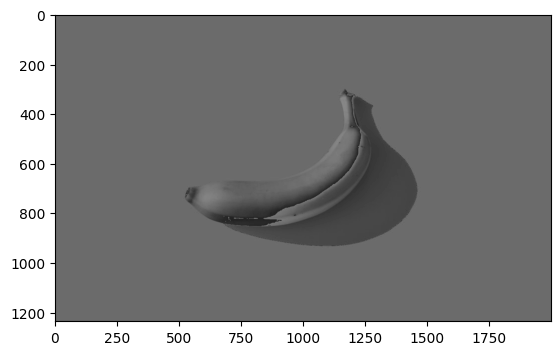

In [ ]:
plt.imshow(inter_img, cmap='gray')